In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint

In [2]:
drug_2008="08-17Crime/DrugCrimes/2008DrugCrimes.csv"
drug_2009="08-17Crime/DrugCrimes/2009DrugCrimes.csv"
drug_2010="08-17Crime/DrugCrimes/2010DrugCrimes.csv"
drug_2011="08-17Crime/DrugCrimes/2011DrugCrimes.csv"
drug_2012="08-17Crime/DrugCrimes/2012DrugCrimes.csv"
drug_2013="08-17Crime/DrugCrimes/2013DrugCrimes.csv"
drug_2014="08-17Crime/DrugCrimes/2014DrugCrimes.csv"
drug_2015="08-17Crime/DrugCrimes/2015DrugCrimes.csv"
drug_2016="08-17Crime/DrugCrimes/2016DrugCrimes.csv"
drug_2017="08-17Crime/DrugCrimes/2017DrugCrimes.csv"

drug_2008_df=pd.read_csv(drug_2008)
drug_2009_df=pd.read_csv(drug_2009)
drug_2010_df=pd.read_csv(drug_2010)
drug_2011_df=pd.read_csv(drug_2011)
drug_2012_df=pd.read_csv(drug_2012)
drug_2013_df=pd.read_csv(drug_2013)
drug_2014_df=pd.read_csv(drug_2014)
drug_2015_df=pd.read_csv(drug_2015)
drug_2016_df=pd.read_csv(drug_2016)
drug_2017_df=pd.read_csv(drug_2017)

In [3]:
combined_crimes=pd.merge(drug_2008_df,drug_2009_df,how='outer',on='Criminal Activity Type')

combined_crimes.head()

,Criminal Activity Type,Number of Crimes_x,"Crime Rate (per 100,000)_x",Number of Crimes_y,"Crime Rate (per 100,000)_y"
0,Buying/Receiving,57,1.15,62,1.23
1,Cultivating/Manufacturing/Publishing,240,4.85,254,5.05
2,Distributing/Selling,"1,744",35.27,"1,800",35.80
3,Exploiting Children,2,0.04,2,0.04
4,Operating/Promoting/Assisting,23,0.47,13,0.26


In [4]:
combined_crimes=combined_crimes.rename(columns={"Number of Crimes_x":"2008 Crimes",
                                                "Crime Rate (per 100,000)_x":"2008",
                                                "Number of Crimes_y":"2009 Crimes",
                                                "Crime Rate (per 100,000)_y":"2009"  
})

combined_crimes.head()

,Criminal Activity Type,2008 Crimes,2008,2009 Crimes,2009
0,Buying/Receiving,57,1.15,62,1.23
1,Cultivating/Manufacturing/Publishing,240,4.85,254,5.05
2,Distributing/Selling,"1,744",35.27,"1,800",35.80
3,Exploiting Children,2,0.04,2,0.04
4,Operating/Promoting/Assisting,23,0.47,13,0.26


In [5]:
combined_crimes=pd.merge(combined_crimes,drug_2010_df,how='outer',on='Criminal Activity Type')

combined_crimes=combined_crimes.rename(columns={"Number of Crimes":"2010 Crimes",
                                                "Crime Rate (per 100,000)":"2010"
                                               })

In [6]:
combined_crimes=pd.merge(combined_crimes,drug_2011_df,how='outer',on='Criminal Activity Type')

combined_crimes=combined_crimes.rename(columns={"Number of Crimes":"2011 Crimes",
                                                "Crime Rate (per 100,000)":"2011"
                                                })

In [7]:
combined_crimes=pd.merge(combined_crimes,drug_2012_df,how='outer',on='Criminal Activity Type')

combined_crimes=combined_crimes.rename(columns={"Number of Crimes":"2012 Crimes",
                                                "Crime Rate (per 100,000)":"2012"
                                               })

In [8]:
combined_crimes=pd.merge(combined_crimes,drug_2013_df,how='outer',on='Criminal Activity Type')

combined_crimes=combined_crimes.rename(columns={"Number of Crimes":"2013 Crimes",
                                                "Crime Rate (per 100,000)":"2013"
                                               })

In [9]:
combined_crimes=pd.merge(combined_crimes,drug_2014_df,how='outer',on='Criminal Activity Type')

combined_crimes=combined_crimes.rename(columns={"Number of Crimes":"2014 Crimes",
                                                "Crime Rate (per 100,000)":"2014"
                                                })

In [10]:
combined_crimes=pd.merge(combined_crimes,drug_2015_df,how='outer',on='Criminal Activity Type')

combined_crimes=combined_crimes.rename(columns={"Number of Crimes":"2015 Crimes",
                                                "Crime Rate (per 100,000)":"2015"
                                                })

In [11]:
combined_crimes=pd.merge(combined_crimes,drug_2016_df,how='outer',on='Criminal Activity Type')

combined_crimes=combined_crimes.rename(columns={"Number of Crimes":"2016 Crimes",
                                                "Crime Rate (per 100,000)":"2016"
                                               })

In [12]:
combined_crimes=pd.merge(combined_crimes,drug_2017_df,how='outer',on='Criminal Activity Type')

combined_crimes=combined_crimes.rename(columns={"Number of Crimes":"2017 Crimes",
                                                "Crime Rate (per 100,000)":"2017"
                                               })
combined_crimes.head()

,Criminal Activity Type,2008 Crimes,2008,2009 Crimes,2009,2010 Crimes,2010,2011 Crimes,2011,2012 Crimes,...,2013 Crimes,2013,2014 Crimes,2014,2015 Crimes,2015,2016 Crimes,2016,2017 Crimes,2017
0,Buying/Receiving,57,1.15,62,1.23,60,1.19,47,0.92,95,...,88,1.67,78,1.45,107,1.96,131,2.40,129,2.29
1,Cultivating/Manufacturing/Publishing,240,4.85,254,5.05,304,6.04,370,7.23,309,...,152,2.88,220,4.10,300,5.49,373,6.82,408,7.26
2,Distributing/Selling,"1,744",35.27,"1,800",35.80,"1,681",33.41,"1,449",28.30,"1,772",...,"1,667",31.62,"1,637",30.51,"1,661",30.37,"1,861",34.04,"1,961",34.88
3,Exploiting Children,2,0.04,2,0.04,NaN,NaN,NaN,NaN,3,...,5,0.09,1,0.02,4,0.07,7,0.13,6,0.11
4,Operating/Promoting/Assisting,23,0.47,13,0.26,10,0.20,13,0.25,16,...,18,0.34,21,0.39,24,0.44,29,0.53,20,0.36


In [13]:
crimeperrate=combined_crimes[['Criminal Activity Type','2008','2009','2010','2011','2012','2013','2014','2015',
                              '2016','2017']]
crimeperrate

,Criminal Activity Type,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Buying/Receiving,1.15,1.23,1.19,0.92,1.83,1.67,1.45,1.96,2.40,2.29
1,Cultivating/Manufacturing/Publishing,4.85,5.05,6.04,7.23,5.95,2.88,4.10,5.49,6.82,7.26
2,Distributing/Selling,35.27,35.80,33.41,28.30,34.13,31.62,30.51,30.37,34.04,34.88
3,Exploiting Children,0.04,0.04,NaN,NaN,0.06,0.09,0.02,0.07,0.13,0.11
4,Operating/Promoting/Assisting,0.47,0.26,0.20,0.25,0.31,0.34,0.39,0.44,0.53,0.36
5,Possessing/Concealing,309.89,294.89,283.29,293.26,331.59,223.43,245.91,269.20,301.64,325.31
6,Transporting/Transmitting/Importing,0.87,1.33,1.41,1.52,1.31,1.99,1.38,2.03,2.94,3.33
7,Using/Consuming,27.89,28.32,27.88,31.78,32.98,29.69,34.46,42.41,45.78,50.32
8,Juvenile Gang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Other Gang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
crimeperrate.dropna(inplace=True)
crimeperrate

C:\Users\dfire\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Criminal Activity Type,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Buying/Receiving,1.15,1.23,1.19,0.92,1.83,1.67,1.45,1.96,2.40,2.29
1,Cultivating/Manufacturing/Publishing,4.85,5.05,6.04,7.23,5.95,2.88,4.10,5.49,6.82,7.26
2,Distributing/Selling,35.27,35.80,33.41,28.30,34.13,31.62,30.51,30.37,34.04,34.88
4,Operating/Promoting/Assisting,0.47,0.26,0.20,0.25,0.31,0.34,0.39,0.44,0.53,0.36
5,Possessing/Concealing,309.89,294.89,283.29,293.26,331.59,223.43,245.91,269.20,301.64,325.31
6,Transporting/Transmitting/Importing,0.87,1.33,1.41,1.52,1.31,1.99,1.38,2.03,2.94,3.33
7,Using/Consuming,27.89,28.32,27.88,31.78,32.98,29.69,34.46,42.41,45.78,50.32


In [15]:
crimeperrate=crimeperrate.drop('2017',axis=1)
crimeperrate

,Criminal Activity Type,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Buying/Receiving,1.15,1.23,1.19,0.92,1.83,1.67,1.45,1.96,2.40
1,Cultivating/Manufacturing/Publishing,4.85,5.05,6.04,7.23,5.95,2.88,4.10,5.49,6.82
2,Distributing/Selling,35.27,35.80,33.41,28.30,34.13,31.62,30.51,30.37,34.04
4,Operating/Promoting/Assisting,0.47,0.26,0.20,0.25,0.31,0.34,0.39,0.44,0.53
5,Possessing/Concealing,309.89,294.89,283.29,293.26,331.59,223.43,245.91,269.20,301.64
6,Transporting/Transmitting/Importing,0.87,1.33,1.41,1.52,1.31,1.99,1.38,2.03,2.94
7,Using/Consuming,27.89,28.32,27.88,31.78,32.98,29.69,34.46,42.41,45.78


In [16]:
crimeperrate=crimeperrate.T
crimeperrate

,0,1,2,4,5,6,7
Criminal Activity Type,Buying/Receiving,Cultivating/Manufacturing/Publishing,Distributing/Selling,Operating/Promoting/Assisting,Possessing/Concealing,Transporting/Transmitting/Importing,Using/Consuming
2008,1.15,4.85,35.27,0.47,309.89,0.87,27.89
2009,1.23,5.05,35.8,0.26,294.89,1.33,28.32
2010,1.19,6.04,33.41,0.2,283.29,1.41,27.88
2011,0.92,7.23,28.3,0.25,293.26,1.52,31.78
2012,1.83,5.95,34.13,0.31,331.59,1.31,32.98
2013,1.67,2.88,31.62,0.34,223.43,1.99,29.69
2014,1.45,4.1,30.51,0.39,245.91,1.38,34.46
2015,1.96,5.49,30.37,0.44,269.2,2.03,42.41
2016,2.4,6.82,34.04,0.53,301.64,2.94,45.78


In [17]:
crimeperrate=crimeperrate.reset_index()
crimeperrate

,index,0,1,2,4,5,6,7
0,Criminal Activity Type,Buying/Receiving,Cultivating/Manufacturing/Publishing,Distributing/Selling,Operating/Promoting/Assisting,Possessing/Concealing,Transporting/Transmitting/Importing,Using/Consuming
1,2008,1.15,4.85,35.27,0.47,309.89,0.87,27.89
2,2009,1.23,5.05,35.8,0.26,294.89,1.33,28.32
3,2010,1.19,6.04,33.41,0.2,283.29,1.41,27.88
4,2011,0.92,7.23,28.3,0.25,293.26,1.52,31.78
5,2012,1.83,5.95,34.13,0.31,331.59,1.31,32.98
6,2013,1.67,2.88,31.62,0.34,223.43,1.99,29.69
7,2014,1.45,4.1,30.51,0.39,245.91,1.38,34.46
8,2015,1.96,5.49,30.37,0.44,269.2,2.03,42.41
9,2016,2.4,6.82,34.04,0.53,301.64,2.94,45.78


In [18]:
crimeperrate=crimeperrate.rename(columns={'index':'Year',0:'Buying/Receiving',
                                          1:'Cultivating/Manufacturing/Publishing',
                                          2:'Distributing/Selling',4:'Operating/Promoting/Assisting',
                                          5:'Possessing/Concealing',6:'Transporting/Transmitting/Importing',
                                          7:'Using/Consuming'})
crimeperrate=crimeperrate.drop(0)
crimeperrate

,Year,Buying/Receiving,Cultivating/Manufacturing/Publishing,Distributing/Selling,Operating/Promoting/Assisting,Possessing/Concealing,Transporting/Transmitting/Importing,Using/Consuming
1,2008,1.15,4.85,35.27,0.47,309.89,0.87,27.89
2,2009,1.23,5.05,35.8,0.26,294.89,1.33,28.32
3,2010,1.19,6.04,33.41,0.2,283.29,1.41,27.88
4,2011,0.92,7.23,28.3,0.25,293.26,1.52,31.78
5,2012,1.83,5.95,34.13,0.31,331.59,1.31,32.98
6,2013,1.67,2.88,31.62,0.34,223.43,1.99,29.69
7,2014,1.45,4.1,30.51,0.39,245.91,1.38,34.46
8,2015,1.96,5.49,30.37,0.44,269.2,2.03,42.41
9,2016,2.4,6.82,34.04,0.53,301.64,2.94,45.78


In [19]:
marijuana='../Drug_Data_Years_Zach/Marijuana_PastMonth_All_Ages_Colorado_2002-2017.csv'

marijuanaUseDF=pd.read_csv(marijuana)
marijuanaUseDF.head()

,outcome,age_group,year_pair,geography,estimate,ci_lower,ci_upper
0,Marijuana Use in the Past Month,12 or Older,2002-03,Colorado,0.084905,0.071134,0.101053
1,Marijuana Use in the Past Month,12 or Older,2003-04,Colorado,0.073297,0.061234,0.087515
2,Marijuana Use in the Past Month,12 or Older,2004-05,Colorado,0.075309,0.063525,0.089071
3,Marijuana Use in the Past Month,12 or Older,2005-06,Colorado,0.077573,0.065206,0.092054
4,Marijuana Use in the Past Month,12 or Older,2006-07,Colorado,0.081342,0.068565,0.096255


In [20]:
marijuanaByYear=marijuanaUseDF.groupby('year_pair').sum()
marijuanaByYear

,estimate,ci_lower,ci_upper
year_pair,,,
2002-03,0.543284,0.449920,0.653907
2003-04,0.480550,0.394956,0.582823
2004-05,0.500089,0.413007,0.603538
2005-06,0.497612,0.411594,0.599332
2006-07,0.519810,0.432997,0.621595
2007-08,0.578317,0.477778,0.696909
2008-09,0.611528,0.506298,0.735526
2009-10,0.678349,0.569213,0.805279
2010-11,0.681546,0.574362,0.805458


In [21]:
marijuanaByYear['estimate']=marijuanaByYear['estimate']*1000
marijuanaByYear

,estimate,ci_lower,ci_upper
year_pair,,,
2002-03,543.284,0.449920,0.653907
2003-04,480.550,0.394956,0.582823
2004-05,500.089,0.413007,0.603538
2005-06,497.612,0.411594,0.599332
2006-07,519.810,0.432997,0.621595
2007-08,578.317,0.477778,0.696909
2008-09,611.528,0.506298,0.735526
2009-10,678.349,0.569213,0.805279
2010-11,681.546,0.574362,0.805458


In [22]:
marijuanaByYear.reset_index(inplace = True)
marijuanaByYear['year_pair'] = marijuanaByYear['year_pair'].apply(lambda x: x.split('-')[0])
marijuanaByYear

,year_pair,estimate,ci_lower,ci_upper
0,2002,543.284,0.449920,0.653907
1,2003,480.550,0.394956,0.582823
2,2004,500.089,0.413007,0.603538
3,2005,497.612,0.411594,0.599332
4,2006,519.810,0.432997,0.621595
5,2007,578.317,0.477778,0.696909
6,2008,611.528,0.506298,0.735526
7,2009,678.349,0.569213,0.805279
8,2010,681.546,0.574362,0.805458
9,2011,657.280,0.553864,0.777399


In [23]:
marijuanaByYear=marijuanaByYear.drop('ci_lower',axis=1)
marijuanaByYear=marijuanaByYear.drop('ci_upper',axis=1)

marijuanaByYear=marijuanaByYear.drop([0,1,2,3,4,5])

marijuanaByYear

,year_pair,estimate
6,2008,611.528
7,2009,678.349
8,2010,681.546
9,2011,657.280
10,2012,758.975
11,2013,863.405
12,2014,912.073
13,2015,878.168
14,2016,891.705


In [24]:
marijuanaByYear=marijuanaByYear.rename(columns={'year_pair':'Year','estimate':'Estimate'})
marijuanaByYear

,Year,Estimate
6,2008,611.528
7,2009,678.349
8,2010,681.546
9,2011,657.280
10,2012,758.975
11,2013,863.405
12,2014,912.073
13,2015,878.168
14,2016,891.705


In [25]:
crimeperrate

,Year,Buying/Receiving,Cultivating/Manufacturing/Publishing,Distributing/Selling,Operating/Promoting/Assisting,Possessing/Concealing,Transporting/Transmitting/Importing,Using/Consuming
1,2008,1.15,4.85,35.27,0.47,309.89,0.87,27.89
2,2009,1.23,5.05,35.8,0.26,294.89,1.33,28.32
3,2010,1.19,6.04,33.41,0.2,283.29,1.41,27.88
4,2011,0.92,7.23,28.3,0.25,293.26,1.52,31.78
5,2012,1.83,5.95,34.13,0.31,331.59,1.31,32.98
6,2013,1.67,2.88,31.62,0.34,223.43,1.99,29.69
7,2014,1.45,4.1,30.51,0.39,245.91,1.38,34.46
8,2015,1.96,5.49,30.37,0.44,269.2,2.03,42.41
9,2016,2.4,6.82,34.04,0.53,301.64,2.94,45.78


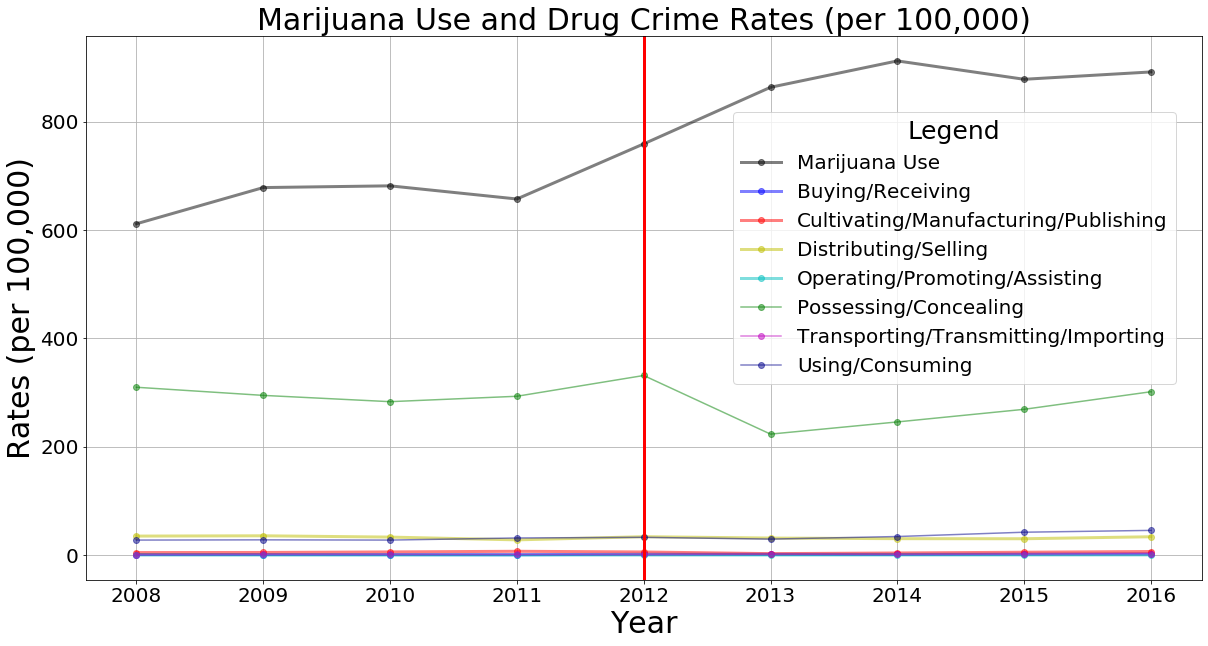

In [36]:
plt.rcParams["figure.figsize"] = [20,10]

plt.plot(marijuanaByYear['Year'],marijuanaByYear['Estimate'],'ko-',linewidth='3',alpha=.5,label='Marijuana Use')
plt.plot(crimeperrate['Year'],crimeperrate['Buying/Receiving'],'bo-',linewidth='3',alpha=.5,
         label='Buying/Receiving')
plt.plot(crimeperrate['Year'],crimeperrate['Cultivating/Manufacturing/Publishing'],'ro-',linewidth='3',
         alpha=.5,label='Cultivating/Manufacturing/Publishing')
plt.plot(crimeperrate['Year'],crimeperrate['Distributing/Selling'],'yo-',linewidth='3',alpha=.5,
         label='Distributing/Selling')
plt.plot(crimeperrate['Year'],crimeperrate['Operating/Promoting/Assisting'],'co-',linewidth='3',alpha=.5,
         label='Operating/Promoting/Assisting')
plt.plot(crimeperrate['Year'],crimeperrate['Possessing/Concealing'],'go-',alpha=.5,
         label='Possessing/Concealing')
plt.plot(crimeperrate['Year'],crimeperrate['Transporting/Transmitting/Importing'],'mo-',alpha=.5,
         label='Transporting/Transmitting/Importing')
plt.plot(crimeperrate['Year'],crimeperrate['Using/Consuming'],'o-',color='darkblue',alpha=.5,label='Using/Consuming')

plt.axvline(x='2012',linewidth='3',color='r')
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)

plt.title('Marijuana Use and Drug Crime Rates (per 100,000)',fontsize='30')
plt.xlabel('Year',fontsize='30')
plt.ylabel('Rates (per 100,000)',fontsize='30')
leg=plt.legend(title='Legend',fontsize=20, loc=(.58,.36))
leg.set_title('Legend',prop={'size': 25})

plt.grid()

plt.savefig('../Final Graphs/Drug Rates per 100,000.png')

plt.show()